In [ ]:
import csv
import math
import random
import numpy as np
import pandas as pd
import gdown

import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(21)

In [ ]:
file_id = '1NHPAsf2zrdyI-ydx_oDhqfNvWVastlSI'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'survey.csv'
gdown.download(url, output, quiet=False)

file_id = '1L_I0_tZKMp9r6PMEJulyVvLW-gs8pbCC'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'AmazonPurchases.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1NHPAsf2zrdyI-ydx_oDhqfNvWVastlSI
To: /content/survey.csv
100%|██████████| 1.34M/1.34M [00:00<00:00, 70.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1L_I0_tZKMp9r6PMEJulyVvLW-gs8pbCC
From (redirected): https://drive.google.com/uc?id=1L_I0_tZKMp9r6PMEJulyVvLW-gs8pbCC&confirm=t&uuid=bf28e9ba-a4c0-4bf9-ab33-0c09728a2449
To: /content/AmazonPurchases.csv
100%|██████████| 351M/351M [00:06<00:00, 51.7MB/s]


'AmazonPurchases.csv'

In [ ]:
purchases = pd.read_csv('AmazonPurchases.csv')
survey = pd.read_csv('survey.csv')

In [ ]:
purchases = purchases.drop(purchases.columns[0], axis=1)
purchases.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care


In [ ]:
purchases.info()
purchases.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850717 entries, 0 to 1850716
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Order Date                object 
 1   Purchase Price Per Unit   float64
 2   Quantity                  int64  
 3   Shipping Address State    object 
 4   Title                     object 
 5   ASIN/ISBN (Product Code)  object 
 6   Survey ResponseID         object 
 7   Category                  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 113.0+ MB


,0
Order Date,0
Purchase Price Per Unit,0
Quantity,0
Survey ResponseID,0
ASIN/ISBN (Product Code),973
Shipping Address State,87812
Category,89658
Title,89740


In [ ]:
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases['year'] = purchases['Order Date'].dt.year
purchases['month'] = purchases['Order Date'].dt.month
purchases['day'] = purchases['Order Date'].dt.day
purchases = purchases[purchases['Order Date'] < '2022-11-01']

In [ ]:
survey.head()

,Survey ResponseID,Q-demos-age,Q-demos-hispanic,Q-demos-race,Q-demos-education,Q-demos-income,Q-demos-gender,Q-sexual-orientation,Q-demos-state,Q-amazon-use-howmany,...,Q-substance-use-marijuana,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society
0,R_1ou69fj4DQGsVcp,35 - 44 years,No,Black or African American,High school diploma or GED,"$25,000 - $49,999",Female,heterosexual (straight),Iowa,2,...,No,Yes,No,No,Lost a job,No,No,No,No,No
1,R_2UbJL30HRjK1sdD,45 - 54 years,No,White or Caucasian,High school diploma or GED,"$100,000 - $149,999",Male,heterosexual (straight),Ohio,2,...,No,No,No,No,NaN,No,No,No,No,Yes
2,R_UPXamGKtmf4RVIZ,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$25,000 - $49,999",Male,heterosexual (straight),Arkansas,1 (just me!),...,No,No,Yes,No,NaN,No,No,No,No,Yes
3,R_2dYk5auG9Fv5Qve,35 - 44 years,Yes,White or Caucasian,"Graduate or professional degree (MA, MS, MBA, ...","$50,000 - $74,999",Male,heterosexual (straight),Tennessee,1 (just me!),...,No,No,No,No,NaN,No,No,No,No,No
4,R_2aP0GyIR66gSTiR,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$50,000 - $74,999",Male,heterosexual (straight),Virginia,2,...,No,Yes,No,No,NaN,No,Yes if consumers get part of the profit,I don't know,No,No


In [ ]:
survey.info()
survey.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5027 entries, 0 to 5026
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Survey ResponseID           5027 non-null   object
 1   Q-demos-age                 5027 non-null   object
 2   Q-demos-hispanic            5027 non-null   object
 3   Q-demos-race                5027 non-null   object
 4   Q-demos-education           5027 non-null   object
 5   Q-demos-income              5027 non-null   object
 6   Q-demos-gender              5027 non-null   object
 7   Q-sexual-orientation        5027 non-null   object
 8   Q-demos-state               5027 non-null   object
 9   Q-amazon-use-howmany        5027 non-null   object
 10  Q-amazon-use-hh-size        5027 non-null   object
 11  Q-amazon-use-how-oft        5027 non-null   object
 12  Q-substance-use-cigarettes  5027 non-null   object
 13  Q-substance-use-marijuana   5027 non-null   obje

,0
Survey ResponseID,0
Q-small-biz-use,0
Q-sell-consumer-data,0
Q-sell-YOUR-data,0
Q-personal-wheelchair,0
Q-personal-diabetes,0
Q-substance-use-alcohol,0
Q-substance-use-marijuana,0
Q-substance-use-cigarettes,0
Q-census-use,0


In [ ]:
survey = survey['Survey ResponseID'].to_frame()
survey.shape[0]

5027

In [ ]:
stratified_sample = survey.apply(lambda x: x.sample(frac=0.20))
stratified_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 957 to 3845
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Survey ResponseID  1005 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [ ]:
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2018, 1, 1)
end_date = datetime(2022, 11, 1)

def generate_random_date(start, end):
    delta = end - start
    random_days = random.randint(0, delta.days)
    return start + timedelta(days=random_days)

stratified_sample['last_purchase_date'] = stratified_sample.apply(lambda x: generate_random_date(start_date, end_date), axis=1)

In [ ]:
stratified_sample.head()

,Survey ResponseID,last_purchase_date
957,R_1dnt2vJuBD1A90P,2021-11-29
4515,R_3HLKIA2u3ZnY9lM,2018-03-13
3019,R_2pReYpR5ZLHJIa0,2019-09-05
4224,R_3I0sWpLFEyMMVOV,2019-03-09
4738,R_10ZbrhoAZPaSEW1,2022-01-11


In [ ]:
merged_df = pd.merge(purchases, stratified_sample, on='Survey ResponseID', how='left')
merged_df.info()
merged_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737058 entries, 0 to 1737057
Data columns (total 12 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Order Date                datetime64[ns]
 1   Purchase Price Per Unit   float64       
 2   Quantity                  int64         
 3   Shipping Address State    object        
 4   Title                     object        
 5   ASIN/ISBN (Product Code)  object        
 6   Survey ResponseID         object        
 7   Category                  object        
 8   year                      int32         
 9   month                     int32         
 10  day                       int32         
 11  last_purchase_date        datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(3), int64(1), object(5)
memory usage: 139.2+ MB


,0
Order Date,0
Purchase Price Per Unit,0
Quantity,0
Shipping Address State,82469
Title,88974
ASIN/ISBN (Product Code),943
Survey ResponseID,0
Category,88900
year,0
month,0


In [ ]:
merged_df['last_purchase_date'] = merged_df['last_purchase_date'].fillna(datetime(2022, 12, 31))
merged_df.isnull().sum()

,0
Order Date,0
Purchase Price Per Unit,0
Quantity,0
Shipping Address State,82469
Title,88974
ASIN/ISBN (Product Code),943
Survey ResponseID,0
Category,88900
year,0
month,0


In [ ]:
final_df = merged_df[merged_df['Order Date'] <= merged_df['last_purchase_date']]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1530763 entries, 0 to 1737049
Data columns (total 12 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Order Date                1530763 non-null  datetime64[ns]
 1   Purchase Price Per Unit   1530763 non-null  float64       
 2   Quantity                  1530763 non-null  int64         
 3   Shipping Address State    1455701 non-null  object        
 4   Title                     1449174 non-null  object        
 5   ASIN/ISBN (Product Code)  1530137 non-null  object        
 6   Survey ResponseID         1530763 non-null  object        
 7   Category                  1449737 non-null  object        
 8   year                      1530763 non-null  int32         
 9   month                     1530763 non-null  int32         
 10  day                       1530763 non-null  int32         
 11  last_purchase_date        1530763 non-null  datetime64[

In [ ]:
final_df['Survey ResponseID'].nunique()

4923

In [ ]:
final_df = final_df.iloc[:, :8]

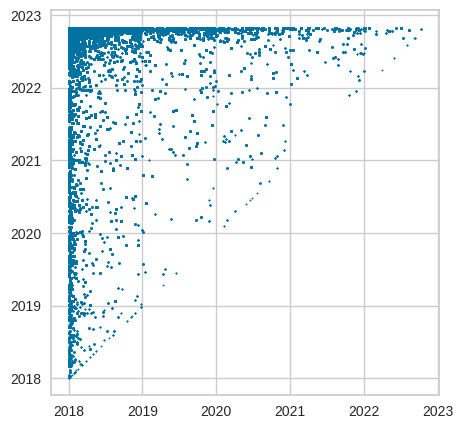

In [ ]:
df_edit = final_df.copy()
df_edit['min_date'] = df_edit.groupby(['Survey ResponseID'])['Order Date'].transform("min")
df_edit['max_date'] = df_edit.groupby(['Survey ResponseID'])['Order Date'].transform("max")
plt.figure(figsize=(5,5))
plt.scatter(df_edit['min_date'],df_edit['max_date'], s = 1)

In [ ]:
import csv

from google.colab import drive
drive.mount('/content/drive')

csv.filename = 'final_df.csv'
final_df.to_csv('/content/drive/MyDrive/' + csv.filename, index=False)

Mounted at /content/drive
